# Zomato Delhi-NCR Analysis: Finding the Perfect Balance Between Ratings and Affordability

 **Zomato Delhi-NCR Analysis: Finding the Perfect Balance Between Ratings and Affordability:**

**Problem Statement**:
To analyze Zomato restaurant data from the Delhi-NCR region to identify key factors influencing restaurant ratings and affordability, with the goal of helping users find the most cost-effective and highly rated dining options, and enabling restaurant owners to optimize offerings for higher profitability.



**Business Context:**
In the highly competitive and dynamic foodservice industry of Delhi-NCR, restaurant owners and food delivery platforms face the challenge of attracting and retaining customers by offering quality food at reasonable prices. Customers increasingly rely on online reviews, ratings, and pricing information to decide where to dine or order from.

Zomato, as a leading restaurant discovery and food delivery platform, collects vast amounts of data on restaurants, including ratings, reviews, pricing, and cuisine types. However, without effective analysis, both consumers and restaurant owners may miss out on valuable insights that could guide better decisions.


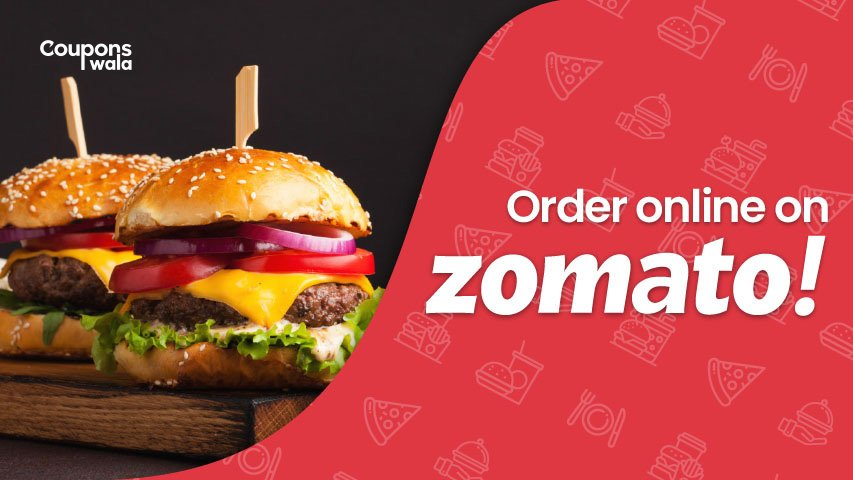

**Data Storage:**
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location

• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies.

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people





Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving zomato.csv to zomato.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Country-Code.xlsx to Country-Code.xlsx


Data Import:

Reading Zomato restaurant data and country code mapping into pandas DataFrames


In [ ]:
import pandas as pd
zomato_df = pd.read_csv("zomato.csv",encoding='ISO-8859-1')
country_df = pd.read_excel('Country-Code.xlsx')

# Basic Exploration of the data

In [ ]:
zomato_df.columns
country_df.columns

Index(['Country Code', 'Country'], dtype='object')

In [ ]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
zomato_df.shape

(9551, 21)

In [ ]:
country_df.shape

(15, 2)

In [ ]:
zomato_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
country_df.describe()

,Country Code
count,15.000000
mean,137.933333
std,80.009345
min,1.000000
25%,65.500000
50%,166.000000
75%,199.500000
max,216.000000


In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


# Exploratory Data Analysis (EDA)

In [ ]:
zomato_df.duplicated().sum()

np.int64(0)

In [ ]:
country_df.duplicated().sum()

np.int64(0)

In [ ]:
zomato_df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
country_df.isnull().sum()

,0
Country Code,0
Country,0


In [ ]:
# Percentage wise null values in columns
zomato_df.isnull().sum()/len(zomato_df)*100

,0
Restaurant ID,0.000000
Restaurant Name,0.000000
Country Code,0.000000
City,0.000000
Address,0.000000
Locality,0.000000
Locality Verbose,0.000000
Longitude,0.000000
Latitude,0.000000
Cuisines,0.094231


In [ ]:
# row-wise null values
zomato_df.isnull().sum(axis=1).sort_values(ascending=False)

,0
328,1
94,1
368,1
87,1
84,1
...,...
3190,0
3191,0
3192,0
3193,0


In [ ]:
#MERGE THE DATASET
zomato_df=zomato_df.merge(country_df,on='Country Code')

In [ ]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,Phillipines


# City-wise top restaurant analysis for India using the Zomato dataset

In [ ]:
india_df = zomato_df[zomato_df['Country_x'] == 'India'].copy()

top_restaurants = india_df.sort_values(by=['City', 'Aggregate rating', 'Votes'], ascending=[True, False, False])
# Get the first restaurant (top rated) in each city
top_restaurants_per_city = top_restaurants.groupby('City').head(1)

print(top_restaurants_per_city[['Restaurant Name', 'City', 'Aggregate rating', 'Votes']])

                        Restaurant Name          City  Aggregate rating  Votes
637                     Sheroes Hangout          Agra               4.9     77
653                            Cryo Lab     Ahmedabad               4.6    166
680                              Eat On     Allahabad               3.7    105
702                     Kesar Da Dhabha      Amritsar               4.1    878
720                     Bhoj Restaurant    Aurangabad               3.7     89
728                                Toit     Bangalore               4.8  10934
748               Sagar Gaire Fast Food        Bhopal               4.9    427
768                     Barbeque Nation  Bhubaneshwar               4.6    154
793                     Barbeque Nation    Chandigarh               4.5   1450
822           AB's - Absolute Barbecues       Chennai               4.9    859
841                             CakeBee    Coimbatore               4.9    200
850                The Great Indian Pub      Dehradu

# Creating separate DataFrames for each country

In [ ]:
indiaRes=zomato_df[zomato_df['Country_x']=='India'].copy()

In [ ]:
canadares=zomato_df[zomato_df['Country_x']=='Canada'].copy()
australiarees=zomato_df[zomato_df['Country_x']=='Australia'].copy()
brazilres=zomato_df[zomato_df['Country_x']=='Brazil'].copy()
turkeyres=zomato_df[zomato_df['Country_x']=='Turkey'].copy()
qatarres=zomato_df[zomato_df['Country_x']=='Qatar'].copy()
ukres=zomato_df[zomato_df['Country_x']=='United Kingdom'].copy()
southafricares=zomato_df[zomato_df['Country_x']=='South Africa'].copy()
newzealandres=zomato_df[zomato_df['Country_x']=='New Zealand'].copy()
srilankares=zomato_df[zomato_df['Country_x']=='Sri Lanka'].copy()
usares=zomato_df[zomato_df['Country_x']=='United States'].copy()
indonesiares=zomato_df[zomato_df['Country_x']=='Indonesia'].copy()

EXPLORING INDIAN RESTAURANT

In [ ]:
indiaRes.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,3,3.9,Yellow,Good,140,India,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,2,3.5,Yellow,Good,71,India,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,2,3.6,Yellow,Good,94,India,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,2,4.0,Green,Very Good,87,India,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,3,4.2,Green,Very Good,177,India,India


In [ ]:
indiaRes.City.value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Guwahati,21
Lucknow,21
Bhubaneshwar,21
Ahmedabad,21


In [ ]:

#top 10 rest in each city
DelhiTopRes=indiaRes[(indiaRes['City']=='New Delhi') & (indiaRes['Aggregate rating']>4.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [ ]:
DelhiTopRes.style.apply(lambda x:['background : green' if x.name== 'Votes'  else 'background : pink' for i in x])

,Aggregate rating,Restaurant Name,Votes
3013,4.900000,Naturals Ice Cream,2620
3601,4.900000,Indian Accent - The Manor,1934
6659,4.600000,The California Boulevard,1691
4639,4.600000,Big Chill,1569
6997,4.700000,Echoes Satyaniketan,1563
7849,4.600000,Cafeteria & Co.,1136
3310,4.600000,Spezia Bistro,1071
6657,4.700000,Naturals Ice Cream,474
4298,4.900000,Masala Library,408
3732,4.600000,Tashan,304


In [ ]:
canadares.City.value_counts()

,count
City,
Chatham-Kent,1
Consort,1
Vineland Station,1
Yorkton,1


In [ ]:

#top 10 rest in each city
ConsortTopRes=canadares[(canadares['City']=='Consort') & (canadares['Aggregate rating']>2)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [ ]:
ConsortTopRes.style.apply(lambda x:['background : yellow' if x.name== 'Votes'  else 'background : red' for i in x])

,Aggregate rating,Restaurant Name,Votes
208,3.000000,Consort Restaurant,6


In [ ]:
singres=zomato_df[zomato_df['Country_x']=='Singapore']
singres.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y
456,18483372,Sky On 57,184,Singapore,"10 Bayfront Avenue, 57 Marina Bay Sands 018956","Bayfront Avenue, Downtown Core","Bayfront Avenue, Downtown Core, Singapore",103.860005,1.282661,"Chinese, Continental, Singaporean",...,No,No,No,4,3.4,Orange,Average,34,Singapore,Singapore
457,18484349,Cut By Wolfgang Puck,184,Singapore,"2 Bayfront Avenue, B1-71 Marina Bay Sands 018972","Bayfront Subzone, Downtown Core","Bayfront Subzone, Downtown Core, Singapore",103.859422,1.285477,"American, Steak",...,No,No,No,4,4.0,Green,Very Good,33,Singapore,Singapore
458,18496057,Restaurant Andre,184,Singapore,41 Bukit Pasoh Road 089855,"Cantonment Road, Outram","Cantonment Road, Outram, Singapore",103.840360,1.279420,"French, Mediterranean, European",...,No,No,No,4,3.8,Yellow,Good,33,Singapore,Singapore
459,18483389,Potato Head Folk,184,Singapore,36 Keong Saik Road 089143,"Chinatown, Outram","Chinatown, Outram, Singapore",103.841669,1.280503,American,...,No,No,No,4,3.1,Orange,Average,34,Singapore,Singapore
460,18483222,Jaan,184,Singapore,"2 Stamford Road, Level 70 Equinox Complex 178882","City Hall, Downtown Core","City Hall, Downtown Core, Singapore",103.853605,1.293221,French,...,No,No,No,4,3.8,Yellow,Good,35,Singapore,Singapore


In [ ]:

#top 10 rest in each city
SingTopRes=singres[(singres['City']=='Singapore') & (singres['Aggregate rating']>3.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [ ]:
singres.City.value_counts()

,count
City,
Singapore,20


In [ ]:
SingTopRes.style.apply(lambda x:['background : pink' if x.name== 'Votes'  else 'background : red' for i in x])

,Aggregate rating,Restaurant Name,Votes
460,3.800000,Jaan,35
474,3.900000,Bitters & Love,35
463,4.100000,Fratini La Trattoria,35
469,3.900000,Summer Pavilion,34
457,4.000000,Cut By Wolfgang Puck,33
458,3.800000,Restaurant Andre,33
461,3.900000,Rhubarb Le Restaurant,33
466,3.700000,Chye Seng Huat Hardware,33
468,3.800000,Colony,30
462,4.200000,Al'frank Cookies,29


# FINDING OUT THE RELATIONSHIP BETWEEN THE RATING AND VOTES

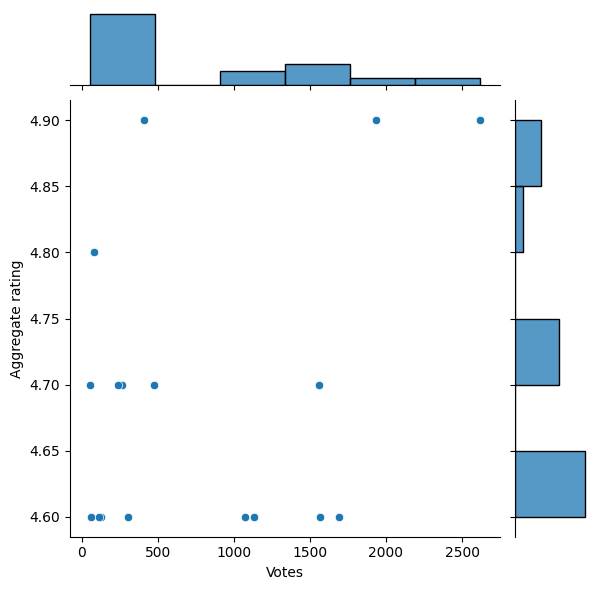

In [ ]:
#3 FINDING OUT THE RELATIONSHIP BETWEEN THE RATING AND VOTES
import seaborn as sns
sns.jointplot(x='Votes',y='Aggregate rating',data= DelhiTopRes)

The joint plot shows:
- A positive correlation between votes and aggregate rating. As the number of votes increases, the aggregate rating tends to increase as well.
- There is a cluster of restaurants with high ratings (above 4.5) but a relatively low number of votes, suggesting that new highly-rated restaurants may not yet have accumulated a large number of reviews.
- Restaurants with a high number of votes are predominantly in the higher rating range (above 4), indicating that popular restaurants are generally well-rated.

# Number of Restaurants in each Country

In [ ]:
#4.NO OF RESTAURANTS IN EACH COUNTRY
india=indiaRes ['Restaurant Name'].nunique()
#nunique = no of unique
india

6604

In [ ]:
singapore=singres ['Restaurant Name'].nunique()
singapore

20

In [ ]:
canada=canadares ['Restaurant Name'].nunique()

canada

4

In [ ]:
turkey=turkeyres ['Restaurant Name'].nunique()
turkey

32

In [ ]:
uk=ukres ['Restaurant Name'].nunique()
uk

74

In [ ]:
qatar=qatarres ['Restaurant Name'].nunique()
qatar

20

In [ ]:
australia=australiarees ['Restaurant Name'].nunique()
australia

24

In [ ]:
srilanka=srilankares ['Restaurant Name'].nunique()
srilanka

20

In [ ]:
newzealand=newzealandres ['Restaurant Name'].nunique()
newzealand

40

In [ ]:
usa=usares ['Restaurant Name'].nunique()
usa

423

In [ ]:
indonesia=indonesiares ['Restaurant Name'].nunique()
indonesia

18

In [ ]:
brazil=brazilres['Restaurant Name'].nunique()
brazil

58

# Top 5 Restaurants with online delivery

In [ ]:

DelhiTopResOnline=indiaRes[(indiaRes['City']=='New Delhi') & (indiaRes['Aggregate rating']>4.5) & (indiaRes['Has Online delivery']=='Yes')][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes').head(5)

In [ ]:
DelhiTopResOnline.style.apply(lambda x:['background : green' if x.name== 'Votes'  else 'background : blue' for i in x])

,Aggregate rating,Restaurant Name,Votes
3013,4.900000,Naturals Ice Cream,2620
3310,4.600000,Spezia Bistro,1071
6657,4.700000,Naturals Ice Cream,474
3014,4.700000,Zabardast Indian Kitchen,242
7180,4.600000,Greenr Cafe,112


# Country which has online delivery

In [ ]:

online_delivery_df = zomato_df[zomato_df['Has Online delivery'] == 'Yes']
countries_with_online_delivery = online_delivery_df['Country_x'].unique()
countries_with_online_delivery


array(['UAE', 'India'], dtype=object)

Cities in india with online delivery

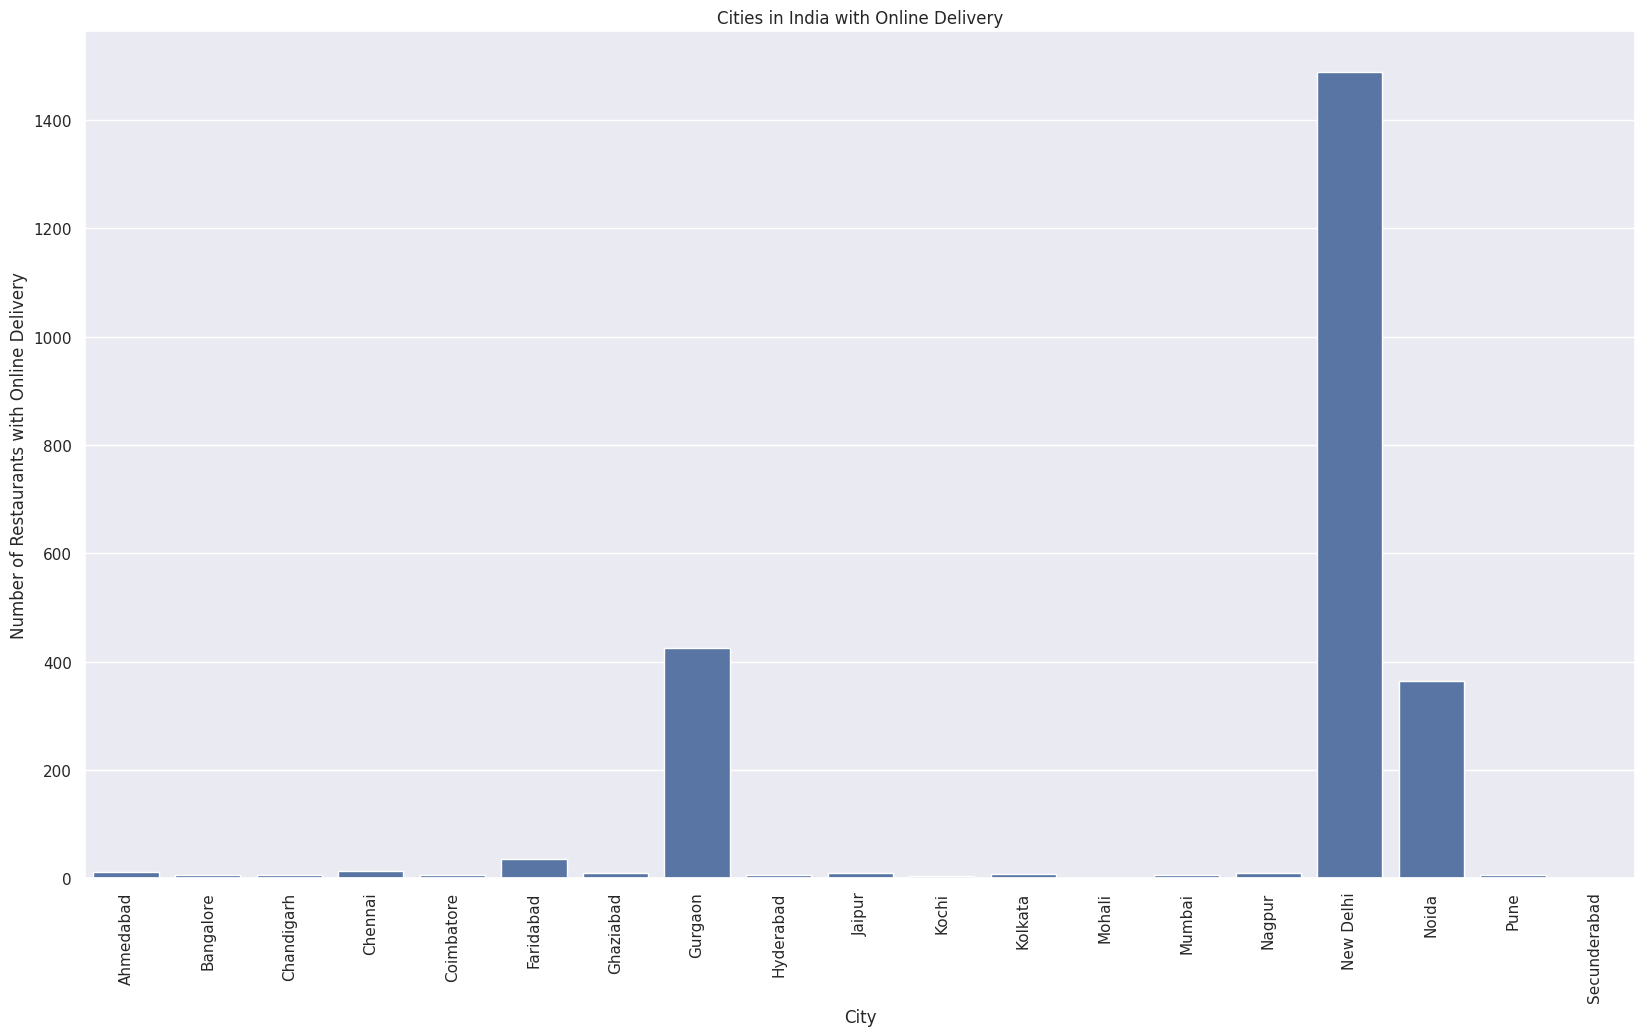

In [ ]:
sns.set(rc={'figure.figsize':(20,11)})
plt.xticks(rotation=90)
sns.countplot(x='City',data=indiaRes[indiaRes['Has Online delivery']=='Yes'])
plt.title('Cities in India with Online Delivery')
plt.xlabel('City')
plt.ylabel('Number of Restaurants with Online Delivery')
plt.show()

# TOP CUISINES IN EACH REGION

In [ ]:

indiaRes[['Cuisines','City']].value_counts()

,,count
Cuisines,City,
North Indian,New Delhi,658
"North Indian, Chinese",New Delhi,284
Fast Food,New Delhi,242
Chinese,New Delhi,228
"North Indian, Mughlai",New Delhi,207
...,...,...
"Thai, Chinese, Seafood",New Delhi,1
"Thai, European, Mexican, North Indian, Chinese, Cafe",New Delhi,1
"Thai, Japanese",New Delhi,1


# Aggregate rating of all the restaurants in each city in a country.

In [ ]:
indiaRes.groupby(['City','Country_x'])['Aggregate rating'].mean()

,,Aggregate rating
City,Country_x,
Agra,India,3.965000
Ahmedabad,India,4.161905
Allahabad,India,3.395000
Amritsar,India,3.685714
Aurangabad,India,3.375000
Bangalore,India,4.375000
Bhopal,India,3.950000
Bhubaneshwar,India,3.980952
Chandigarh,India,4.050000


In [ ]:

table=pd.pivot_table(data=zomato_df,index=('Country_x','City'),values ="Aggregate rating")


In [ ]:
cm=sns.light_palette("blue",as_cmap=True)
#cmap is the color mapping

table.style.background_gradient(cmap=cm,axis=0)

In [ ]:
cm=sns.color_palette("rocket", as_cmap=True)
#done this using the seaborn color palettes
table.style.background_gradient(cmap=cm,axis=0)

# Avearge cost for two

The average amount of money two people would typically spend together at a restaurant.

<Axes: ylabel='Average Cost for two'>

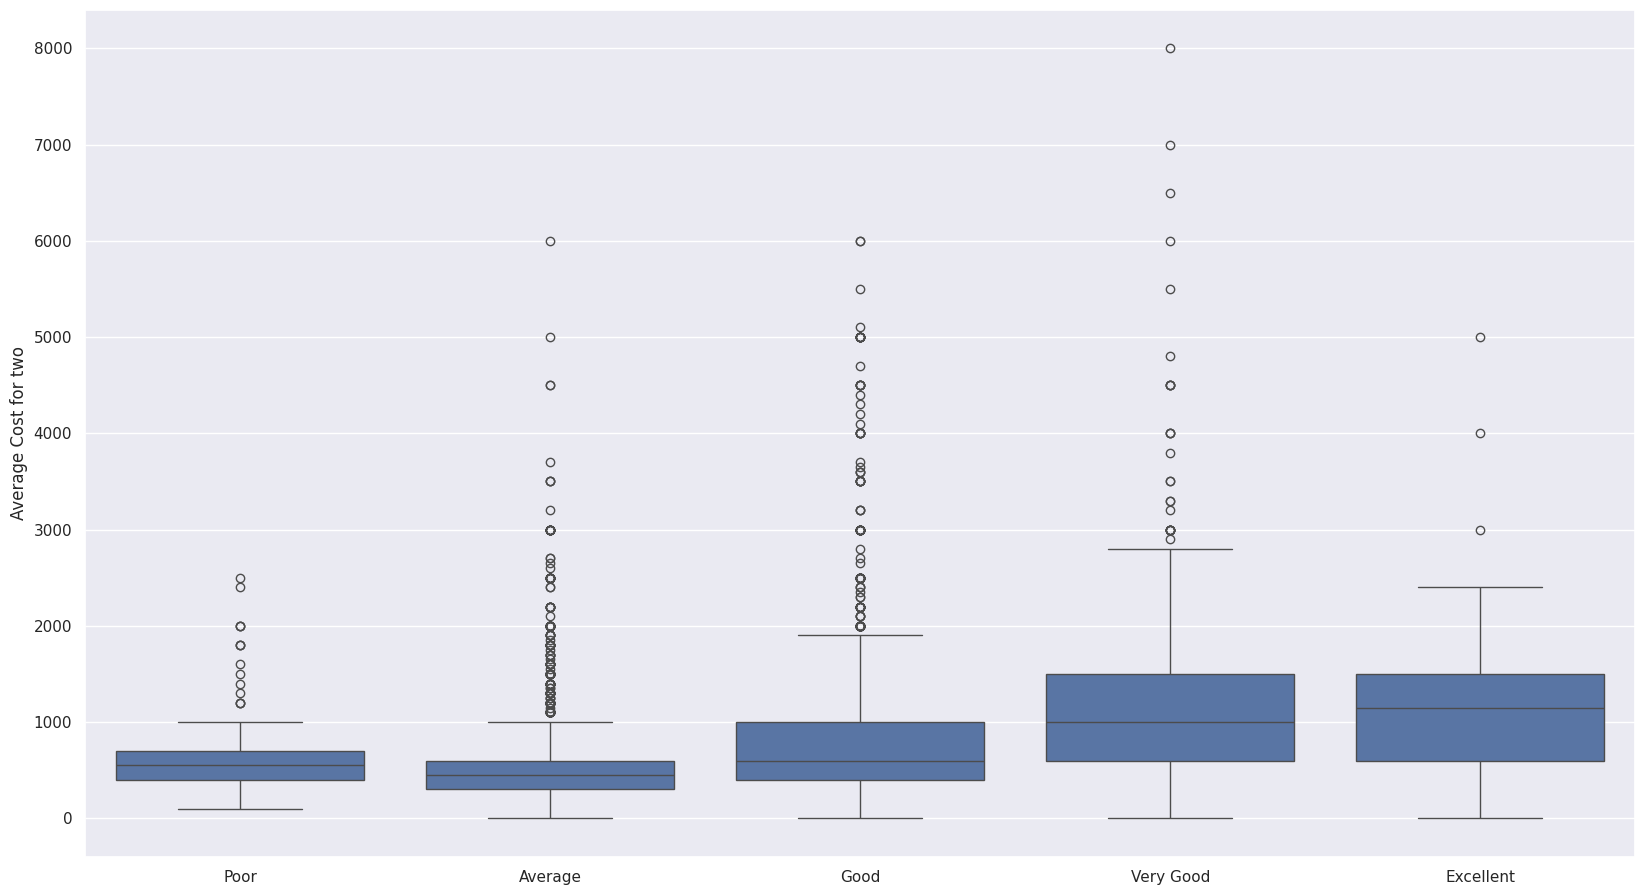

In [ ]:
avgcostfortwo=indiaRes['Average Cost for two']
aggregatefindres=pd.Categorical(values=indiaRes['Rating text'],categories=['Poor','Average','Good','Very Good','Excellent'])
sns.boxplot(x=aggregatefindres,y=avgcostfortwo)

<Axes: ylabel='count'>

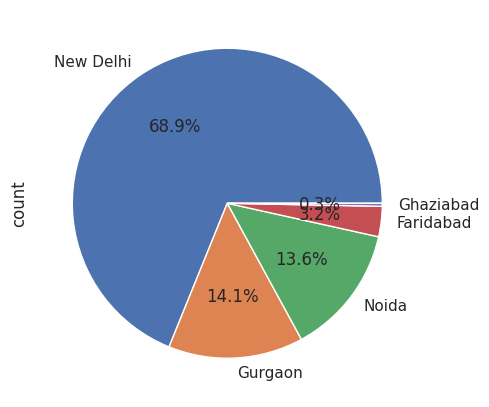

In [ ]:
#10.
plt.figure(figsize=(5,6))
indiaRes['City'].value_counts().head().plot(kind='pie',autopct ="%1.1f%%")

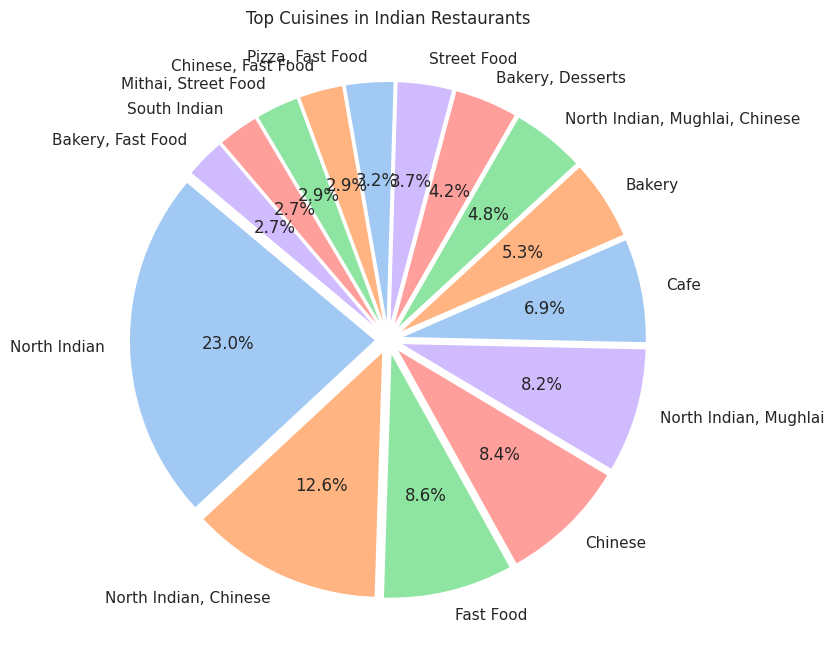

In [ ]:

top_cuisines = indiaRes['Cuisines'].value_counts().nlargest(15)

# Pie chart details
colors = sns.color_palette("pastel")[0:5]
explode = [0.05] * len(top_cuisines)
# to slightly separate all slices

plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Top Cuisines in Indian Restaurants')
plt.show()


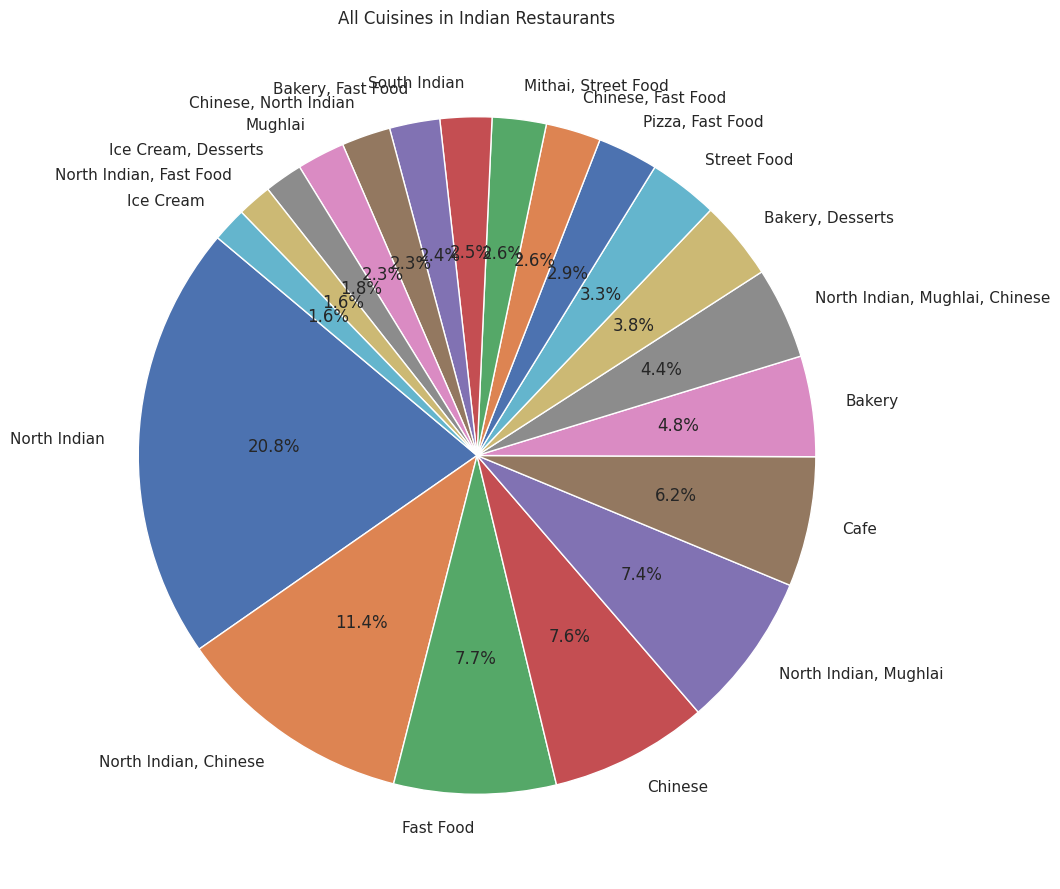

/tmp/ipython-input-47-1337476448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_cuisines.index, y=all_cuisines.values, palette="viridis")


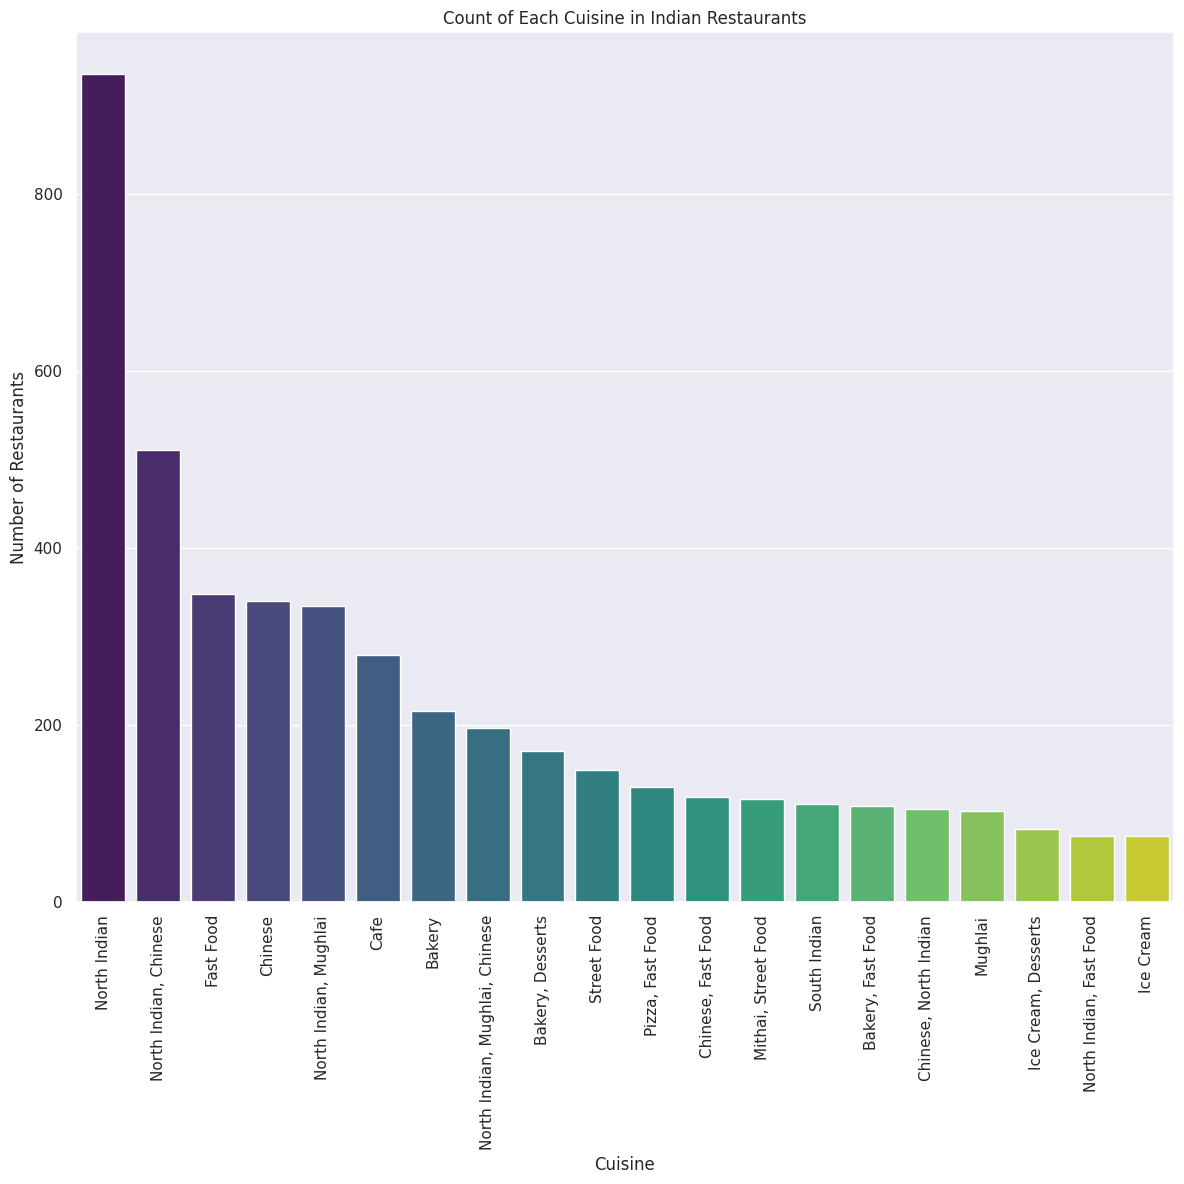

In [ ]:

all_cuisines = indiaRes['Cuisines'].value_counts().nlargest(20)

plt.pie(all_cuisines, labels=all_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('All Cuisines in Indian Restaurants')
plt.show()

plt.figure(figsize=(12, 12))
sns.barplot(x=all_cuisines.index, y=all_cuisines.values, palette="viridis")
plt.title('Count of Each Cuisine in Indian Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This project is an exploratory data analysis of Zomato restaurant data. It involves:

1.  **Data Loading and Merging:** Loading restaurant data from a CSV file and country codes from an Excel file, then merging them based on the country code.
2.  **Identifying Top Restaurants:** Finding the highest-rated restaurants in each city within India, considering both rating and votes.
3.  **Analyzing Regional Data:** Filtering the dataset for specific countries (India, Canada, Australia, Brazil, Turkey, Qatar, UK, South Africa, New Zealand, Sri Lanka, USA, Indonesia, Singapore) to perform country-specific analysis.
4.  **Exploring City-Specific Top Restaurants:** Identifying top restaurants in specific cities like New Delhi (India), Consort (Canada), and Singapore, based on ratings and votes.
5.  **Investigating Rating and Votes Relationship:** Visualizing the relationship between the number of votes and the aggregate rating using a joint plot.
6.  **Counting Restaurants per Country:** Determining the number of unique restaurants present in selected countries.
7.  **Identifying Top Restaurants with Online Delivery:** Finding the top 5 restaurants in New Delhi that offer online delivery, based on rating and votes.
8.  **Analyzing Online Delivery Availability by Country:** Visualizing which countries have restaurants offering online delivery using a count plot.
9.  **Exploring Top Cuisines:** Identifying and visualizing the most popular cuisines in Indian restaurants using pie charts and a bar plot.
10. **Analyzing Aggregate Rating per City and Country:** Calculating the average aggregate rating for restaurants in each city within each country and presenting it as a pivot table with color gradients.
11. **Relating Average Cost for Two to Rating:** Using a boxplot to visualize the distribution of 'Average Cost for two' across different rating categories ('Poor', 'Average', 'Good', 'Very Good', 'Excellent') specifically for Indian restaurants.
